In [1]:
cd "C:/Users/kangyuwang/OneDrive/portfolio/python_geo/Lesson 5"

C:\Users\kangyuwang\OneDrive\portfolio\python_geo\Lesson 5


In [2]:
#Import packages
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import mapclassify
from bokeh.plotting import figure, save
from bokeh.models import ColumnDataSource, HoverTool, LogColorMapper

In [3]:
#Read data
grid=gpd.read_file("dataE5/TravelTimes_to_5975375_RailwayStation.shp")
roads=gpd.read_file("dataE5/roads.shp")
metro=gpd.read_file("dataE5/metro.shp")
points=gpd.read_file("dataE5/addresses.shp")

In [4]:
#Adjust coordination system
gridCRS=grid.crs
roads=roads.to_crs(gridCRS)
metro=metro.to_crs(gridCRS)
points=points.to_crs(gridCRS)

In [5]:
grid.head(5)

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.0001358641 6697750.000038058,..."
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.0001358146 6697750.000038053,..."
2,30133,50,31872,56,5785642,32940,121,146,32940,113,133,5975375,29626,423,"POLYGON ((382500.0001357661 6697750.000038046,..."
3,32690,54,34429,60,5785643,33233,125,150,33233,117,144,5975375,29919,427,"POLYGON ((382750.0001357181 6697750.000038039,..."
4,31872,42,31834,48,5787544,32127,109,126,32127,101,121,5975375,31674,452,"POLYGON ((381250.0001360176 6697500.000038121,..."


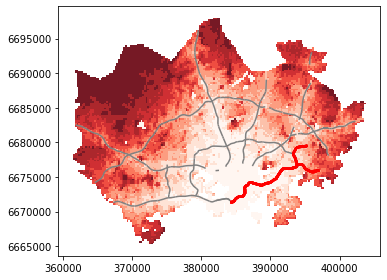

In [6]:
#Visualization of maps
my_map=grid.plot(column="car_r_t", linewidth=0.03, cmap="Reds", scheme="quantiles", k=9, alpha=0.9)
roads.plot(ax=my_map, color="grey", linewidth=1.5)
metro.plot(ax=my_map, color="red", linewidth=2.5)
plt.tight_layout()
plt.savefig("static_map.png", dpi=300)

In [7]:
#Interactive maps
p=figure(title="My first interactive plot")
p
x_coords=[0, 1, 2, 3, 4]
y_coords=[5, 4, 1, 2, 0]
p.circle(x=x_coords, y=y_coords, size=10, color="red")
save(obj=p, filename="points.html")

C:\ProgramData\Anaconda3\lib\site-packages\bokeh\io\saving.py:126: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
C:\ProgramData\Anaconda3\lib\site-packages\bokeh\io\saving.py:139: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'C:\\Users\\kangyuwang\\OneDrive\\portfolio\\python_geo\\Lesson 5\\points.html'

In [8]:
#Using Bokeh and Geopandas
points.head()

,address,id,geometry
0,"Kampinkuja 1, 00100 Helsinki, Finland",1001,POINT (385149.4478367225 6671962.669661295)
1,"Kaivokatu 8, 00101 Helsinki, Finland",1002,POINT (385804.9853879581 6672108.604159364)
2,"Hermanstads strandsväg 1, 00580 Helsingfors, F...",1003,POINT (387834.3668702977 6673995.246252355)
3,"Itäväylä, 00900 Helsinki, Finland",1004,POINT (394273.706337673 6676825.896046941)
4,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",1005,POINT (384626.2727378063 6670664.629381315)


In [9]:
points.loc[:, "x"]=points.loc[:, 'geometry'].x
points.loc[:, "y"]=points.loc[:, 'geometry'].y
points.head()
points=points.drop("geometry", axis=1)
points.head()

,address,id,x,y
0,"Kampinkuja 1, 00100 Helsinki, Finland",1001,385149.447837,6.671963e+06
1,"Kaivokatu 8, 00101 Helsinki, Finland",1002,385804.985388,6.672109e+06
2,"Hermanstads strandsväg 1, 00580 Helsingfors, F...",1003,387834.366870,6.673995e+06
3,"Itäväylä, 00900 Helsinki, Finland",1004,394273.706338,6.676826e+06
4,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",1005,384626.272738,6.670665e+06


In [10]:
#Turn DataFrame into ColumnDataSource
psource=ColumnDataSource(points)
psource

ColumnDataSource(id='1113', ...)

In [11]:
p=figure(title="A map of address points from a shapefiles")
p.circle("x", "y", source=psource, color="red", size=10)
save(obj=p, filename="point_map.html")

'C:\\Users\\kangyuwang\\OneDrive\\portfolio\\python_geo\\Lesson 5\\point_map.html'

In [12]:
#Adding interactivity to the map 
##Import HoverTool
from bokeh.models import HoverTool
my_hover=HoverTool()
##Define Tooltips 
my_hover.tooltips=[("Address of the Point", "@address")]
p.add_tools(my_hover)
save(obj=p, filename="point_map_hover.html")

'C:\\Users\\kangyuwang\\OneDrive\\portfolio\\python_geo\\Lesson 5\\point_map_hover.html'

In [13]:
#Line maps
metro.head()

,NUMERO,SUUNTA,geometry
0,1300M,1,LINESTRING (395360.222060516 6679514.826319194...
1,1300M,2,LINESTRING (384223.529403562 6671360.762176151...
2,1300M1,1,LINESTRING (395360.222060516 6679514.826319194...
3,1300M1,2,LINESTRING (393483.9532311981 6676347.80259114...
4,1300M2,1,LINESTRING (393483.9532311981 6676347.80259114...


In [14]:
metro.loc[:, "x"]=metro.loc[:, "geometry"].apply(lambda f: list(f.xy[0]))
metro.loc[:, "y"]=metro.loc[:, "geometry"].apply(lambda f: list(f.xy[1]))
metro.head()

,NUMERO,SUUNTA,geometry,x,y
0,1300M,1,LINESTRING (395360.222060516 6679514.826319194...,"[395360.22206051595, 393873.25958299276, 39379...","[6679514.826319194, 6679253.214463393, 6679209..."
1,1300M,2,LINESTRING (384223.529403562 6671360.762176151...,"[384223.529403562, 384451.2296691205, 384571.1...","[6671360.762176151, 6671372.425183229, 6671389..."
2,1300M1,1,LINESTRING (395360.222060516 6679514.826319194...,"[395360.22206051595, 393873.25958299276, 39379...","[6679514.826319194, 6679253.214463393, 6679209..."
3,1300M1,2,LINESTRING (393483.9532311981 6676347.80259114...,"[393483.9532311981, 393636.56340274215, 393729...","[6676347.80259114, 6676424.923500663, 6676486...."
4,1300M2,1,LINESTRING (393483.9532311981 6676347.80259114...,"[393483.9532311981, 393178.4064846945, 393011....","[6676347.80259114, 6676274.632699818, 6676231...."


In [15]:
##Turn DataFrame into ColumnDataSource
from bokeh.models import ColumnDataSource
metro=metro.drop("geometry", axis=1).copy()
msource=ColumnDataSource(metro)
msource

ColumnDataSource(id='1305', ...)

In [16]:
##Make map
p=figure(title="LineString Map")
p.multi_line("x", "y",source=msource, color="red", line_width=3)
save(obj=p, filename="metro.html")

'C:\\Users\\kangyuwang\\OneDrive\\portfolio\\python_geo\\Lesson 5\\metro.html'

In [17]:
##Add Hover
from bokeh.models import HoverTool
my_hover=HoverTool()
##Define Tooltips 
my_hover.tooltips=[("NUMERO", "@NUMERO")]
p.add_tools(my_hover)
save(obj=p, filename="metro_map_hover.html")

'C:\\Users\\kangyuwang\\OneDrive\\portfolio\\python_geo\\Lesson 5\\metro_map_hover.html'

In [18]:
grid.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.0001358641 6697750.000038058,..."
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.0001358146 6697750.000038053,..."
2,30133,50,31872,56,5785642,32940,121,146,32940,113,133,5975375,29626,423,"POLYGON ((382500.0001357661 6697750.000038046,..."
3,32690,54,34429,60,5785643,33233,125,150,33233,117,144,5975375,29919,427,"POLYGON ((382750.0001357181 6697750.000038039,..."
4,31872,42,31834,48,5787544,32127,109,126,32127,101,121,5975375,31674,452,"POLYGON ((381250.0001360176 6697500.000038121,..."


In [19]:
grid.loc[:, "x"]=grid.loc[:, "geometry"].apply(lambda f: list(f.exterior.xy[0]))
grid.loc[:, "y"]=grid.loc[:, "geometry"].apply(lambda f: list(f.exterior.xy[1]))

In [20]:
grid=grid.replace(-1, 999)

In [21]:
len(grid.loc[: "geometry"])
breaks=[x for x in range(5, 200, 5)]
classifier=mapclassify.User_Defined.make(bins=breaks)
pt_classify=classifier(grid.loc[:, "pt_r_tt"])
grid.loc[:, "pt_r_tt_ud"] = pt_classify
grid.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry,x,y,pt_r_tt_ud
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.0001358641 6697750.000038058,...","[382000.00013586413, 381750.0001359122, 381750...","[6697750.000038058, 6697750.000038066, 6698000...",27
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.0001358146 6697750.000038053,...","[382250.0001358146, 382000.00013586413, 382000...","[6697750.000038053, 6697750.000038058, 6698000...",26
2,30133,50,31872,56,5785642,32940,121,146,32940,113,133,5975375,29626,423,"POLYGON ((382500.0001357661 6697750.000038046,...","[382500.0001357661, 382250.0001358146, 382250....","[6697750.000038046, 6697750.000038053, 6698000...",26
3,32690,54,34429,60,5785643,33233,125,150,33233,117,144,5975375,29919,427,"POLYGON ((382750.0001357181 6697750.000038039,...","[382750.0001357181, 382500.0001357661, 382500....","[6697750.000038039, 6697750.000038046, 6698000...",28
4,31872,42,31834,48,5787544,32127,109,126,32127,101,121,5975375,31674,452,"POLYGON ((381250.0001360176 6697500.000038121,...","[381250.0001360176, 381000.00013606605, 381000...","[6697500.000038121, 6697500.0000381265, 669775...",24


In [22]:
from bokeh.models import ColumnDataSource
grid=grid.drop("geometry", axis=1).copy()
gsource=ColumnDataSource(grid)

In [23]:
##Create Palette
from bokeh.palettes import RdYlBu11 as palette
from bokeh.models import LogColorMapper
color_mapper=LogColorMapper(palette=palette)

In [24]:
##Combine three maps
p1=figure(title="Travel times with Public transportation to Central Railway station")
p1.patches("x", "y", source=gsource, 
         fill_color={"field": "pt_r_tt_ud", "transform":color_mapper}, fill_alpha=1.0, line_color="black", line_width=0.05)
save(obj=p1, filename="travel_time_map.html")

'C:\\Users\\kangyuwang\\OneDrive\\portfolio\\python_geo\\Lesson 5\\travel_time_map.html'